In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 

In [19]:
! python -m pip install seaborn

In [1]:
!pip install textblob nltk wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 565.7 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 949.3 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 596.8 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 617.9 kB/s eta 0:00:000:0100:01


In [33]:
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [36]:
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re


In [35]:
import nltk

# required NLTK resources
nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

True

In [19]:
# base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
# pages = 10
# page_size = 100

# reviews = []

# # for i in range(1, pages + 1):
# for i in range(1, pages + 1):

#     print(f"Scraping page {i}")

#     # Create URL to collect links from paginated data
#     url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

#     # Collect HTML data from this page
#     response = requests.get(url)

#     # Parse content
#     content = response.content
#     parsed_content = BeautifulSoup(content, 'html.parser')
#     for para in parsed_content.find_all("div", {"class": "text_content"}):
#         reviews.append(para.get_text())
    
#     print(f"   ---> {len(reviews)} total reviews")

In [41]:
# Load the data
df = pd.read_csv('BA_reviews.csv')

In [42]:
# look at the first five rows of the nfl_data file. 

df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | I booked through BA becaus...
1,1,✅ Trip Verified | British airways lost bags ...
2,2,✅ Trip Verified | The check in process and rew...
3,3,"✅ Trip Verified | We flew in November 2023, ..."
4,4,✅ Trip Verified | I left for London from Johan...


In [43]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:-1]

Unnamed: 0    0
dtype: int64

In [44]:
# check accident data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [13]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/puri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/puri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/puri/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [45]:
# Preprocessing functions
def preprocess_text(text):
    # Remove non-alphabetic characters and lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    
    # Tokenization
    words = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

In [46]:
# Apply preprocessing
df['cleaned_reviews'] = df['reviews'].apply(preprocess_text)

In [47]:
# Sentiment analysis with TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [48]:
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)

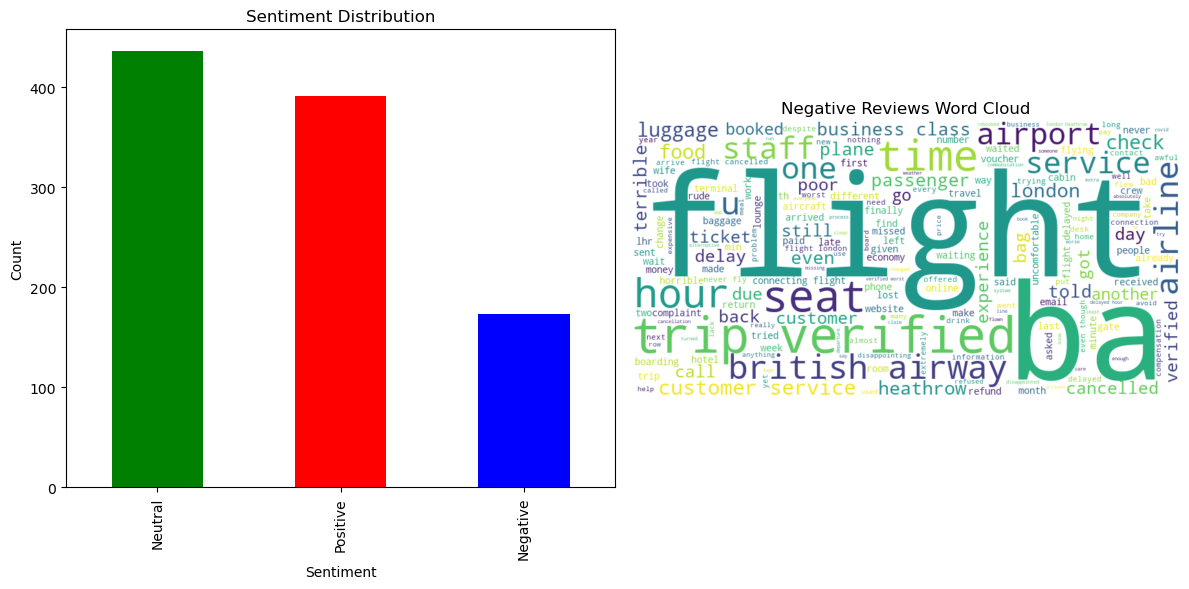

Sentiment Distribution:
sentiment
Neutral     436
Positive    391
Negative    173
Name: count, dtype: int64

Sample Negative Reviews:
['✅ Trip Verified | The check in process and reward/loyalty program is a mess. I am never able to get points, even when trying it through a partner airline. Unfortunately for work I have to travel with them sometimes.  This time, the flight was delayed.'
 "✅ Trip Verified |\xa0 \xa0I'm so fraustrated. My flight was cancelled last minute, which wasn't the end of the world, even though the earliest I could get re-booked was three days later. It's the insane saga of events that proceeded to claim the compensation that I'm legally entitled to according to EU rules. Used their claims page and all was OK. It was from there that it became incomprehensibly frustrating. My case was closed but no confirmation of what the conclusion was or any money. I tried calling but kept being lead in circles; customer services can't speak to the claims team, the claims team ca

In [51]:
# Visualization
plt.figure(figsize=(12, 6))

# Sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
plt.subplot(1, 2, 1)
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Word cloud for negative reviews
plt.subplot(1, 2, 2)
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['cleaned_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

# Display results
print("Sentiment Distribution:")
print(sentiment_counts)
print("\nSample Negative Reviews:")
print(df[df['sentiment'] == 'Negative']['reviews'].head(3).values)
print("\nSample Positive Reviews:")
print(df[df['sentiment'] == 'Positive']['reviews'].head(3).values)